In [1]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('winequality_red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [9]:
#profile = ProfileReport(df)
#profile

In [4]:
X = df.drop(columns='quality')
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [5]:
Y = df.quality
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.25,random_state=30)

In [7]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1178,5.6,0.915,0.00,2.1,0.041,17.0,78.0,0.99346,3.68,0.73,11.4
1189,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3
961,7.1,0.560,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3
...,...,...,...,...,...,...,...,...,...,...,...
919,8.4,0.620,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8
1164,9.0,0.785,0.24,1.7,0.078,10.0,21.0,0.99692,3.29,0.67,10.0
500,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0
941,9.9,0.270,0.49,5.0,0.082,9.0,17.0,0.99484,3.19,0.52,12.5


In [8]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1147,10.0,0.410,0.45,6.20,0.071,6.0,14.0,0.99702,3.21,0.49,11.8
659,7.1,0.840,0.02,4.40,0.096,5.0,13.0,0.99700,3.41,0.57,11.0
871,6.9,0.560,0.03,1.50,0.086,36.0,46.0,0.99522,3.53,0.57,10.6
1333,9.1,0.775,0.22,2.20,0.079,12.0,48.0,0.99760,3.18,0.51,9.6
1411,6.4,0.470,0.40,2.40,0.071,8.0,19.0,0.99630,3.56,0.73,10.6
...,...,...,...,...,...,...,...,...,...,...,...
721,8.9,0.480,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2
490,9.3,0.775,0.27,2.80,0.078,24.0,56.0,0.99840,3.31,0.67,10.6
575,12.3,0.270,0.49,3.10,0.079,28.0,46.0,0.99930,3.20,0.80,10.2
1051,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2


In [9]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
import sklearn
import matplotlib.pyplot as plt 
from sklearn import tree 
%matplotlib inline

[Text(0.548133148006135, 0.9722222222222222, 'X[10] <= 10.35\ngini = 0.642\nsamples = 1199\nvalue = [8, 35, 512, 477, 153, 14]'),
 Text(0.32204823071866784, 0.9166666666666666, 'X[6] <= 95.5\ngini = 0.528\nsamples = 666\nvalue = [6, 20, 406, 209, 23, 2]'),
 Text(0.2015022458369851, 0.8611111111111112, 'X[9] <= 0.585\ngini = 0.554\nsamples = 584\nvalue = [6, 19, 332, 202, 23, 2]'),
 Text(0.07567375109553023, 0.8055555555555556, 'X[6] <= 90.5\ngini = 0.468\nsamples = 261\nvalue = [3, 14, 179, 63, 2, 0]'),
 Text(0.05307843996494303, 0.75, 'X[10] <= 9.075\ngini = 0.453\nsamples = 250\nvalue = [3, 14, 176, 55, 2, 0]'),
 Text(0.018404907975460124, 0.6944444444444444, 'X[6] <= 39.0\ngini = 0.604\nsamples = 15\nvalue = [0, 2, 6, 7, 0, 0]'),
 Text(0.011393514460999123, 0.6388888888888888, 'X[9] <= 0.54\ngini = 0.406\nsamples = 8\nvalue = [0, 1, 1, 6, 0, 0]'),
 Text(0.007887817703768623, 0.5833333333333334, 'X[1] <= 0.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0, 0]'),
 Text(0.00438212094

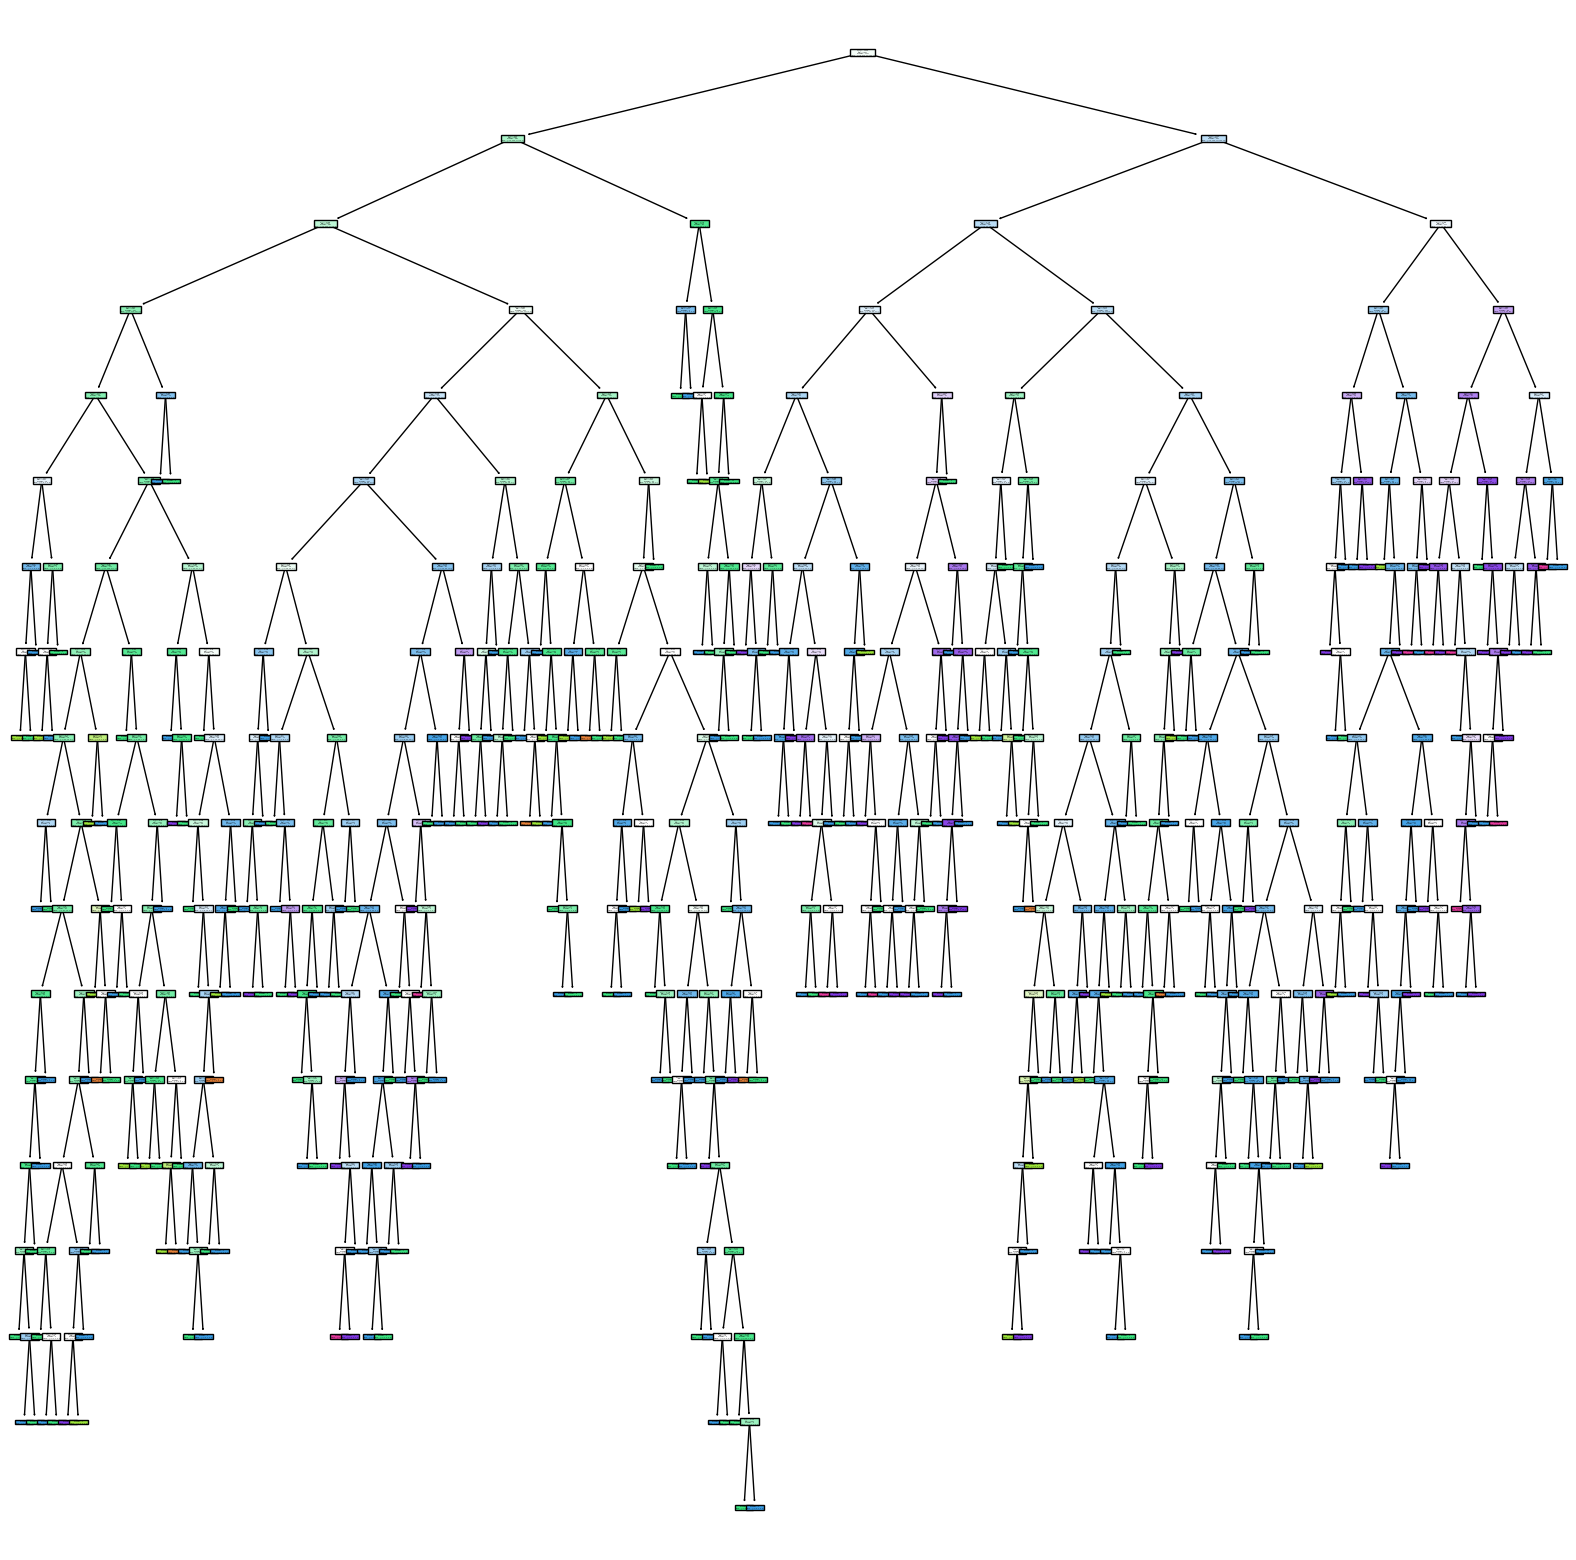

In [11]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

In [11]:
df1 = df.head(40)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [12]:
x1 = df1.drop(columns='quality')
y1 = df1.quality

In [13]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

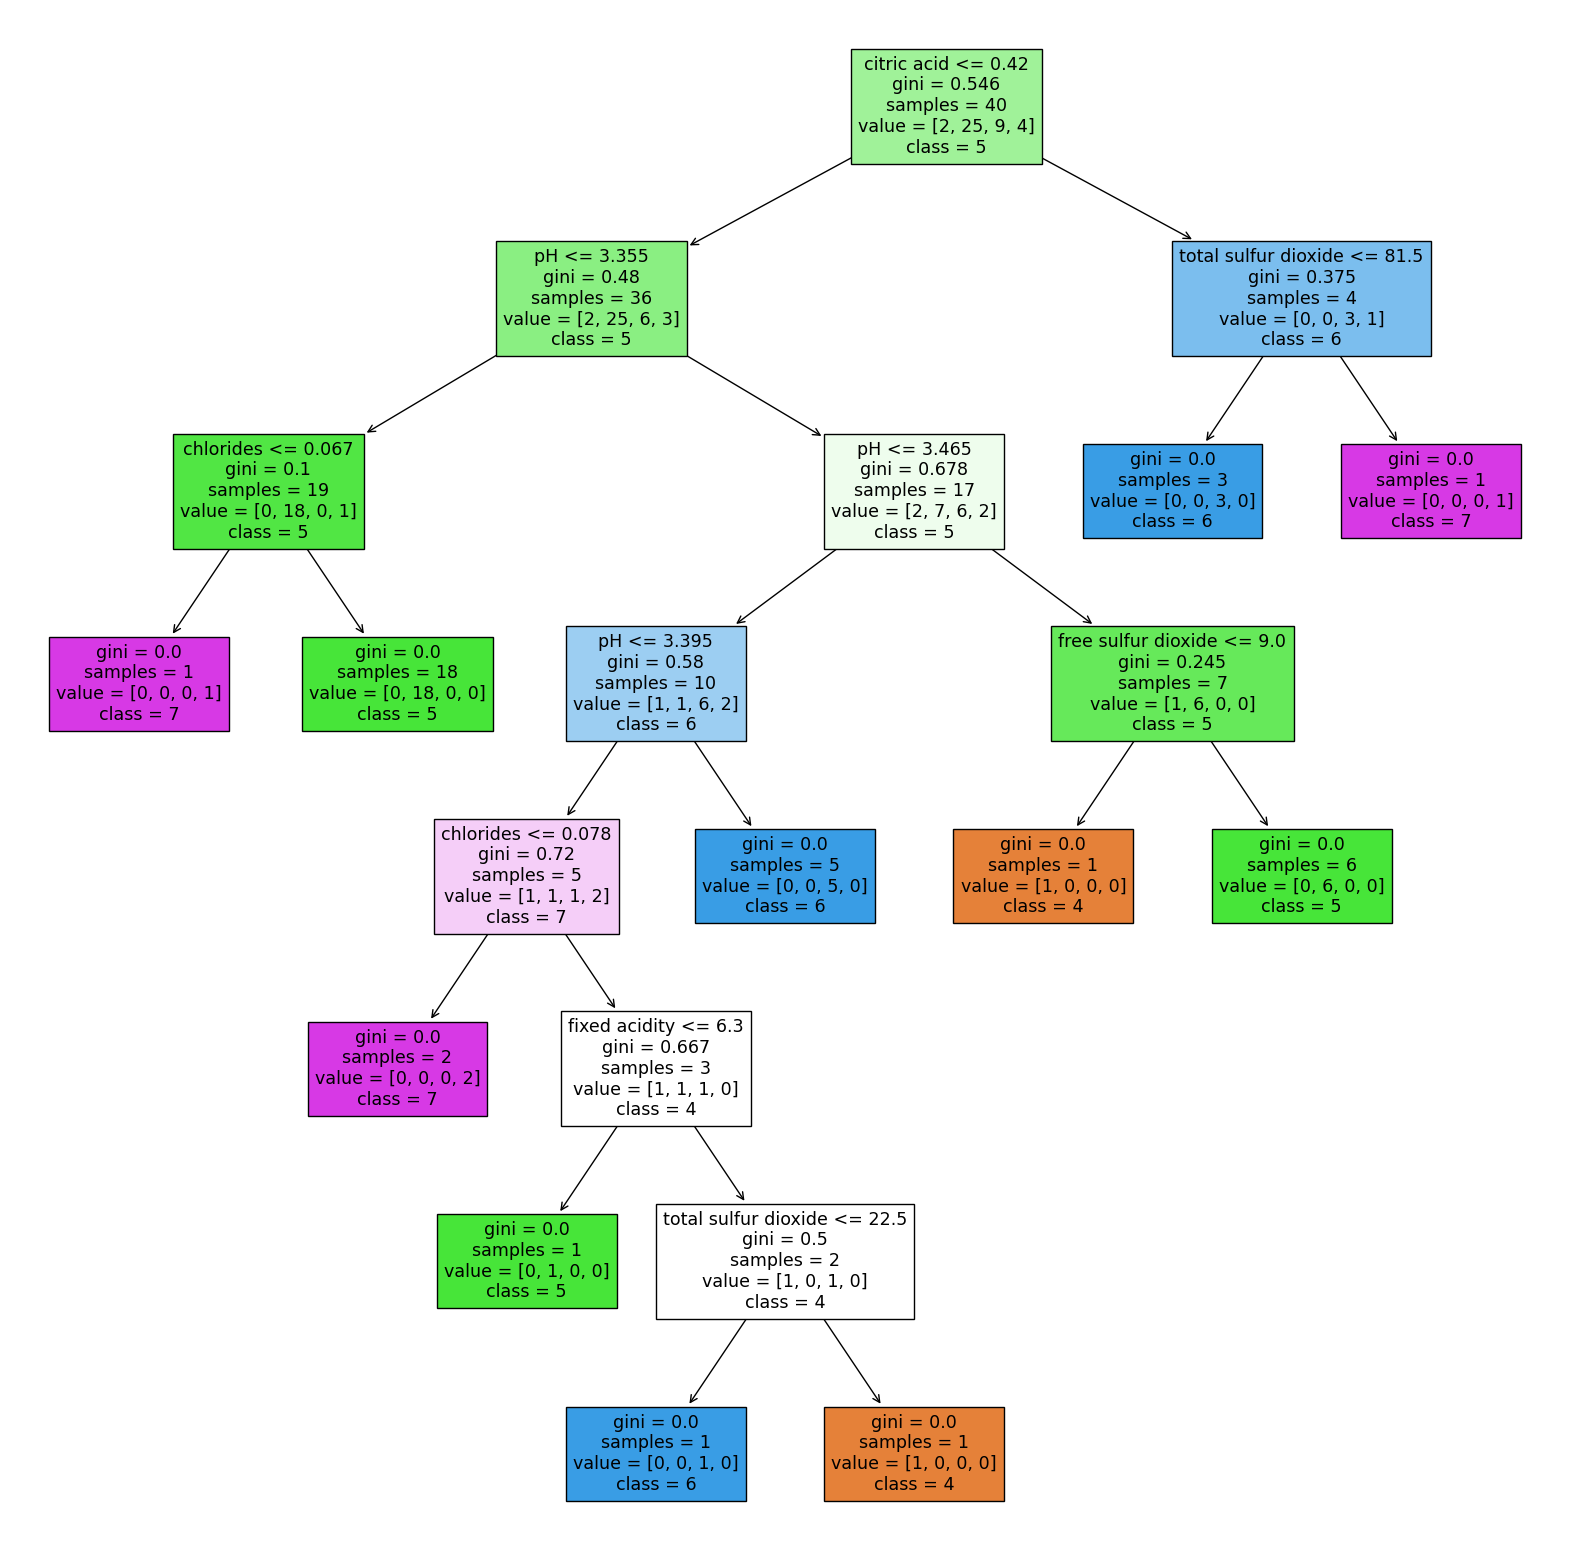

In [14]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True,class_names=[str(i) for i in set(y1)] ,feature_names=x1.columns)
plt.savefig('dt_model_wine_red')

In [15]:
set(y1)

{4, 5, 6, 7}

In [16]:
x1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [17]:
dt_model1.predict(x1)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5], dtype=int64)

In [18]:
dt_model1.score(x1,y1)

1.0

In [19]:
dt_model1.score(x_test,y_test)

0.425

In [20]:
dt_model1.cost_complexity_pruning_path(x1,y1)

{'ccp_alphas': array([0.        , 0.025     , 0.0375    , 0.04      , 0.04285714,
        0.04736842, 0.055     , 0.09117481]),
 'impurities': array([0.        , 0.05      , 0.0875    , 0.1275    , 0.17035714,
        0.21772556, 0.27272556, 0.54625   ])}

In [21]:
path = dt_model1.cost_complexity_pruning_path(x1,y1)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.025     , 0.0375    , 0.04      , 0.04285714,
       0.04736842, 0.055     , 0.09117481])

Text(0, 0.5, 'score')

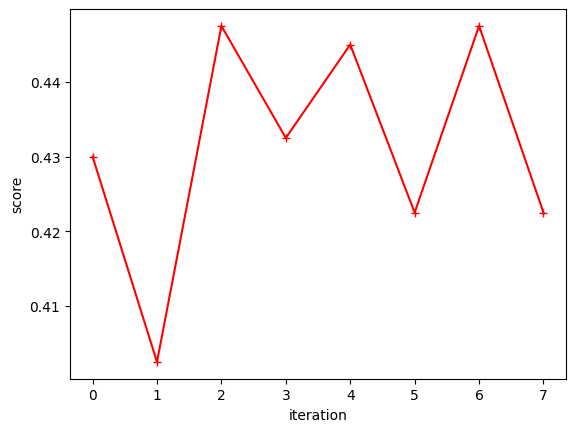

In [24]:
dt_model2 = []
score = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test, y_test))

plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [25]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.025),
 DecisionTreeClassifier(ccp_alpha=0.0375),
 DecisionTreeClassifier(ccp_alpha=0.039999999999999994),
 DecisionTreeClassifier(ccp_alpha=0.042857142857142864),
 DecisionTreeClassifier(ccp_alpha=0.0473684210526316),
 DecisionTreeClassifier(ccp_alpha=0.05500000000000002),
 DecisionTreeClassifier(ccp_alpha=0.09117481203007516)]

In [26]:
train_score = [i.score(x1,y1) for i in dt_model2]
test_score = [i.score(x_test,y_test) for i in dt_model2]

In [27]:
train_score

[1.0, 0.95, 0.925, 0.9, 0.875, 0.85, 0.825, 0.625]

In [28]:
test_score

[0.43, 0.4025, 0.4475, 0.4325, 0.445, 0.4225, 0.4475, 0.4225]

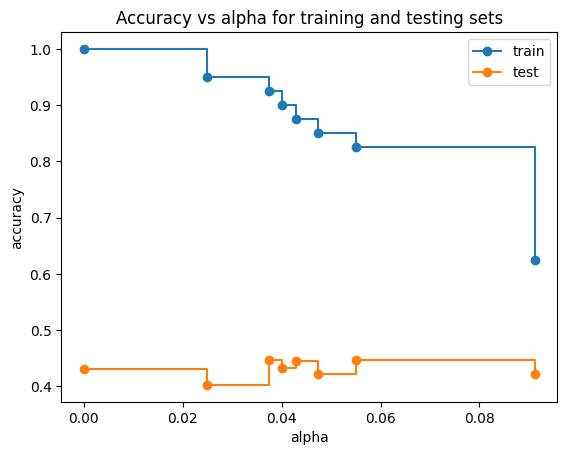

In [29]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [30]:
dt_model_ccp = DecisionTreeClassifier(random_state=0,ccp_alpha=0.14)
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.14, random_state=0)

[Text(0.5, 0.5, 'gini = 0.546\nsamples = 40\nvalue = [2, 25, 9, 4]')]

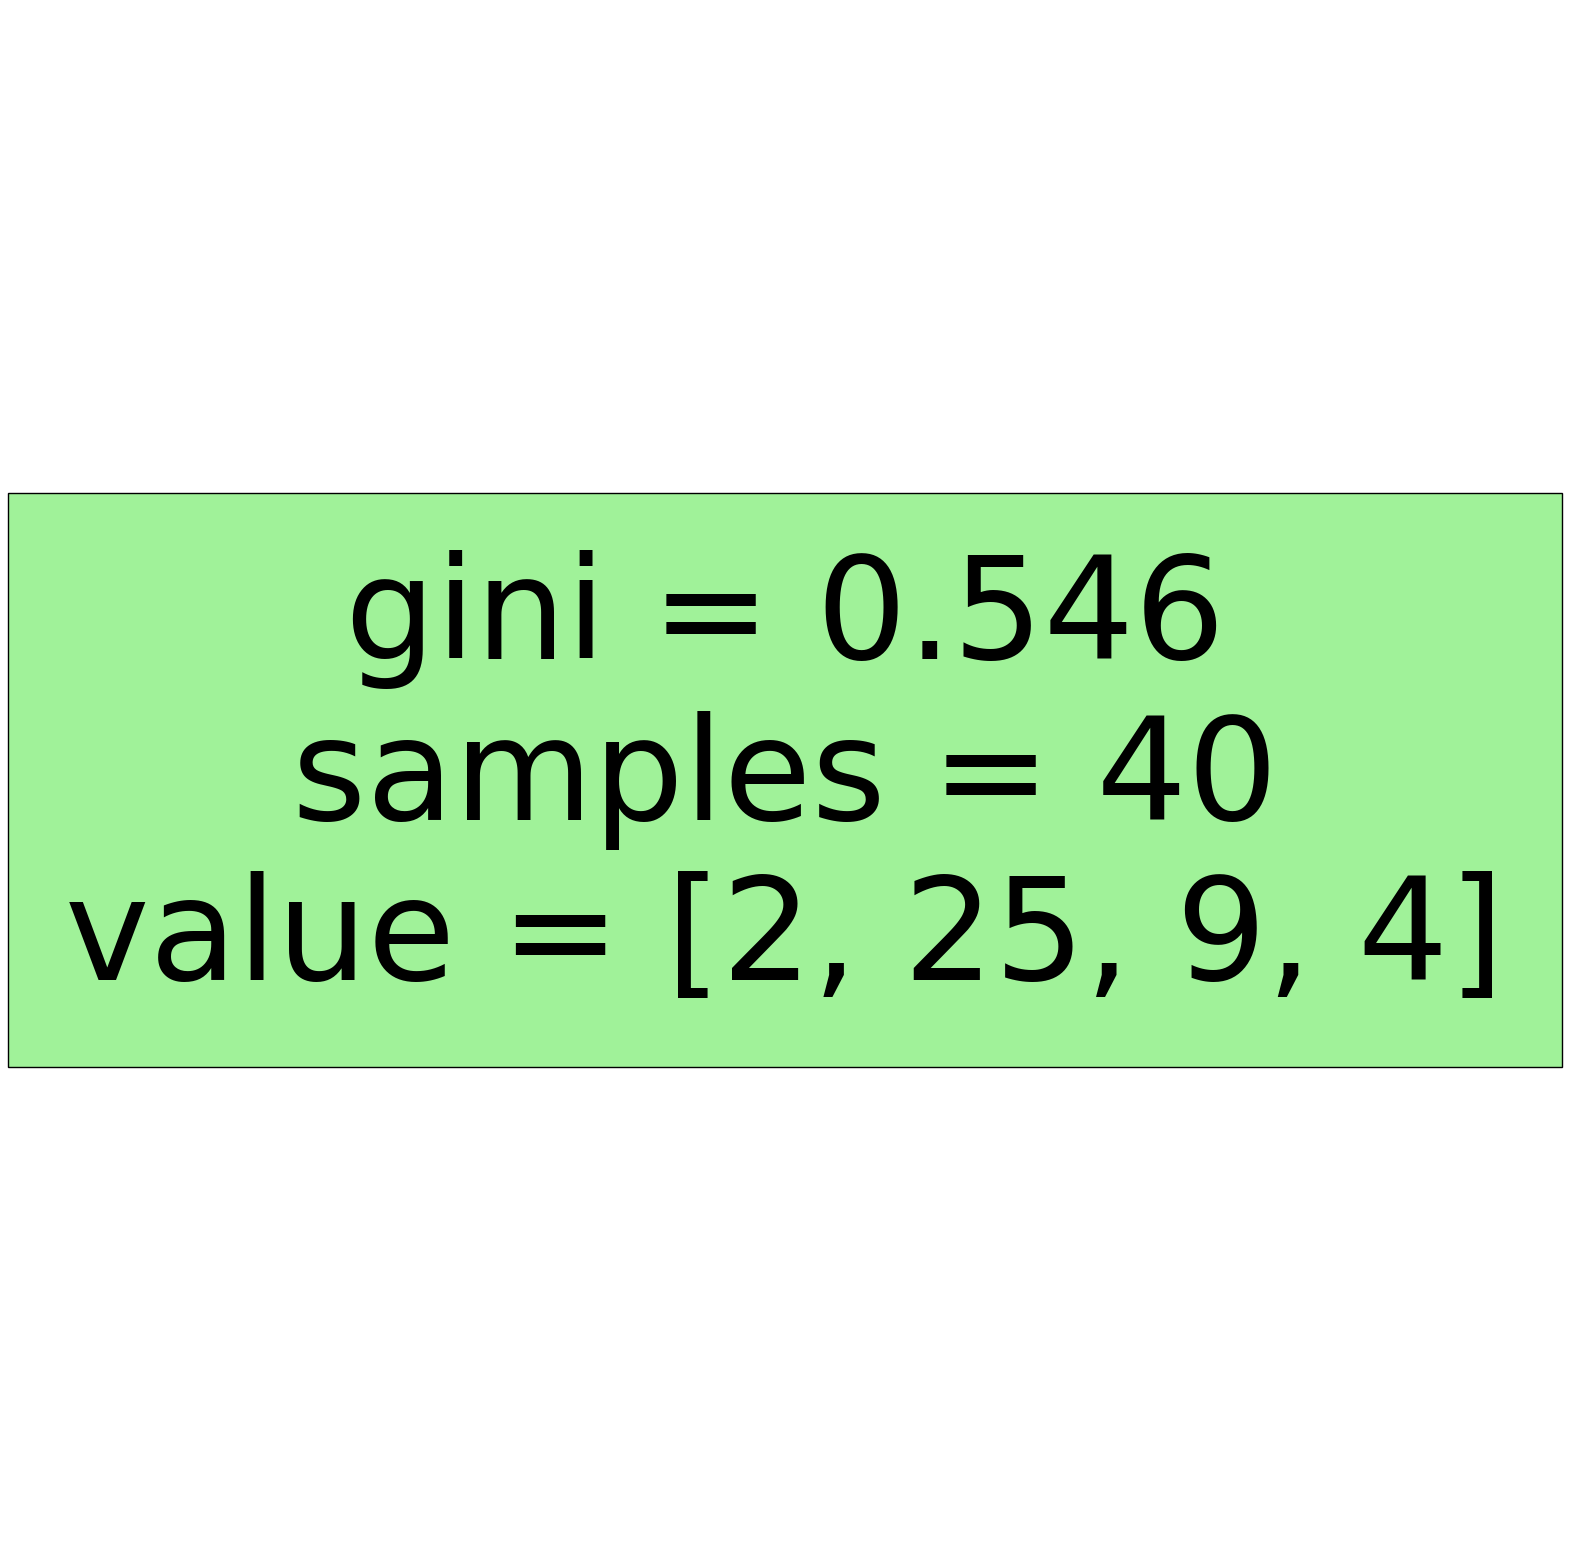

In [31]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [32]:
dt_model_ccp.score(x1,y1)

0.625

In [33]:
dt_model_ccp.score(x_test,y_test)

0.4225

In [34]:
'''
grid_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20)
            }
'''

In [35]:
#grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram , cv = 10 , n_jobs=-1)

In [40]:
#grid_ccp.fit(x1,y1)
#grid_ccp.best_params_

In [42]:
rand_pram = {"criterion":['gini','entropy'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
            }

In [45]:
rand_ccp = RandomizedSearchCV(estimator=dt_model_ccp,param_distributions=rand_pram , cv = 10 , n_jobs=-1)

In [47]:
rand_ccp.fit(x1,y1)

c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.14,
                                                    random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 40),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [48]:
rand_ccp.best_params_

{'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 38,
 'criterion': 'gini'}

In [49]:
dt_cpp_new = DecisionTreeClassifier(criterion='entropy' , max_depth=17 ,min_samples_leaf=1 , min_samples_split=3 , splitter='random',ccp_alpha=0.014)

In [50]:
dt_cpp_new.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, criterion='entropy', max_depth=17,
                       min_samples_split=3, splitter='random')

In [51]:
dt_cpp_new.score(x1,y1)

0.975

In [52]:
dt_cpp_new.score(x_test,y_test)

0.44

In [53]:
pred = dt_cpp_new.predict(x_train)

In [54]:
confusion_matrix(y_train,pred)

array([[  0,   1,   5,   2,   0,   0],
       [  0,   5,  20,   6,   4,   0],
       [  0,  44, 283, 111,  74,   0],
       [  0,  18, 186, 173, 100,   0],
       [  0,   1,  41,  68,  43,   0],
       [  0,   0,   3,   7,   4,   0]], dtype=int64)

In [22]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 19/12/2022

In [36]:
from sklearn.ensemble import BaggingClassifier

In [38]:
bag_dt=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10)

In [41]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [42]:
bag_dt.predict(x_test)

array([6, 3, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 7, 6, 5, 5, 6, 6, 5, 7,
       6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 6, 5,
       5, 7, 6, 6, 6, 6, 6, 7, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7, 5, 7, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 7, 5, 5, 5, 5, 5, 6,
       5, 6, 5, 7, 5, 6, 5, 6, 5, 7, 5, 5, 5, 5, 6, 7, 6, 7, 7, 5, 6, 5,
       5, 5, 5, 7, 7, 6, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6, 6, 5, 6, 5, 5, 5,
       5, 5, 7, 6, 6, 5, 6, 7, 5, 5, 6, 5, 5, 5, 5, 5, 7, 7, 5, 5, 5, 6,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 5, 6, 7, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 7, 6, 5, 7, 6,
       5, 6, 6, 5, 6, 5, 6, 7, 7, 7, 6, 6, 6, 5, 7, 5, 6, 5, 7, 5, 5, 7,
       6, 6, 7, 6, 5, 5, 5, 5, 7, 5, 5, 5, 6, 7, 6, 5, 5, 6, 6, 6, 5, 5,
       6, 5, 6, 6, 6, 7, 6, 5, 5, 7, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 7, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5,
       6, 5, 5, 6, 5, 5, 5, 7, 5, 6, 5, 7, 7, 6, 6,

In [43]:
bag_dt.base_estimator

DecisionTreeClassifier()

In [44]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [56]:
bag_dt.score(x_test,y_test)

0.6875

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
bag_knc=BaggingClassifier(KNeighborsClassifier(6),n_estimators=100)

In [50]:
bag_knc.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6),
                  n_estimators=100)

In [51]:
bag_knc.predict(x_test)

array([7, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 6, 6,
       5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 7, 5, 6, 6, 5,
       6, 7, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 7, 5, 5, 6, 6, 7, 7, 6, 5, 5, 6, 6,
       5, 5, 5, 6, 5, 7, 6, 7, 5, 6, 5, 7, 6, 5, 5, 7, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 7, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 7, 5, 5, 5, 6, 7, 7, 5, 7, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5,
       5, 7, 6, 7, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 7, 6, 6, 5, 5, 6, 5, 7, 5, 6, 5,
       5, 6, 6, 6, 6, 5, 5, 6, 7, 6, 7, 6, 6, 6, 5, 5, 5, 5, 5, 6, 7, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 7, 6, 7, 6, 5, 5, 6, 5, 6, 5, 6,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6,
       5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 4, 6, 5, 6, 6, 5, 5, 6, 6, 5,
       7, 6, 5, 7, 6, 5, 6, 7, 5, 6, 6, 5, 5, 7, 5,

In [57]:
bag_knc.score(x_test,y_test)

0.49

In [52]:
from sklearn.ensemble import  RandomForestClassifier

In [67]:
rf = RandomForestClassifier(n_estimators=10)

In [68]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [69]:
rf.score(x_test,y_test)

0.6525

In [70]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1886226159),
 DecisionTreeClassifier(max_features='sqrt', random_state=2081803000),
 DecisionTreeClassifier(max_features='sqrt', random_state=1517371976),
 DecisionTreeClassifier(max_features='sqrt', random_state=1766856146),
 DecisionTreeClassifier(max_features='sqrt', random_state=239809682),
 DecisionTreeClassifier(max_features='sqrt', random_state=55549002),
 DecisionTreeClassifier(max_features='sqrt', random_state=387075302),
 DecisionTreeClassifier(max_features='sqrt', random_state=999971717),
 DecisionTreeClassifier(max_features='sqrt', random_state=1335129792),
 DecisionTreeClassifier(max_features='sqrt', random_state=1469256408)]

In [71]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1886226159)

[Text(0.49470747470384996, 0.9736842105263158, 'X[10] <= 10.35\ngini = 0.636\nsamples = 752\nvalue = [6, 32, 522, 475, 155, 9]'),
 Text(0.23747146470878577, 0.9210526315789473, 'X[1] <= 0.425\ngini = 0.515\nsamples = 411\nvalue = [3, 18, 411, 202, 23, 2]'),
 Text(0.08292201382033564, 0.868421052631579, 'X[4] <= 0.08\ngini = 0.602\nsamples = 87\nvalue = [0, 0, 45, 70, 18, 2]'),
 Text(0.04738400789733465, 0.8157894736842105, 'X[4] <= 0.046\ngini = 0.486\nsamples = 37\nvalue = [0, 0, 8, 44, 10, 2]'),
 Text(0.04343534057255676, 0.7631578947368421, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.05133267522211254, 0.7631578947368421, 'X[2] <= 0.465\ngini = 0.46\nsamples = 36\nvalue = [0, 0, 6, 44, 10, 2]'),
 Text(0.0315893385982231, 0.7105263157894737, 'X[5] <= 33.0\ngini = 0.359\nsamples = 28\nvalue = [0, 0, 6, 37, 3, 1]'),
 Text(0.023692003948667325, 0.6578947368421053, 'X[6] <= 83.0\ngini = 0.301\nsamples = 23\nvalue = [0, 0, 3, 34, 3, 1]'),
 Text(0.019743336623889437, 0.

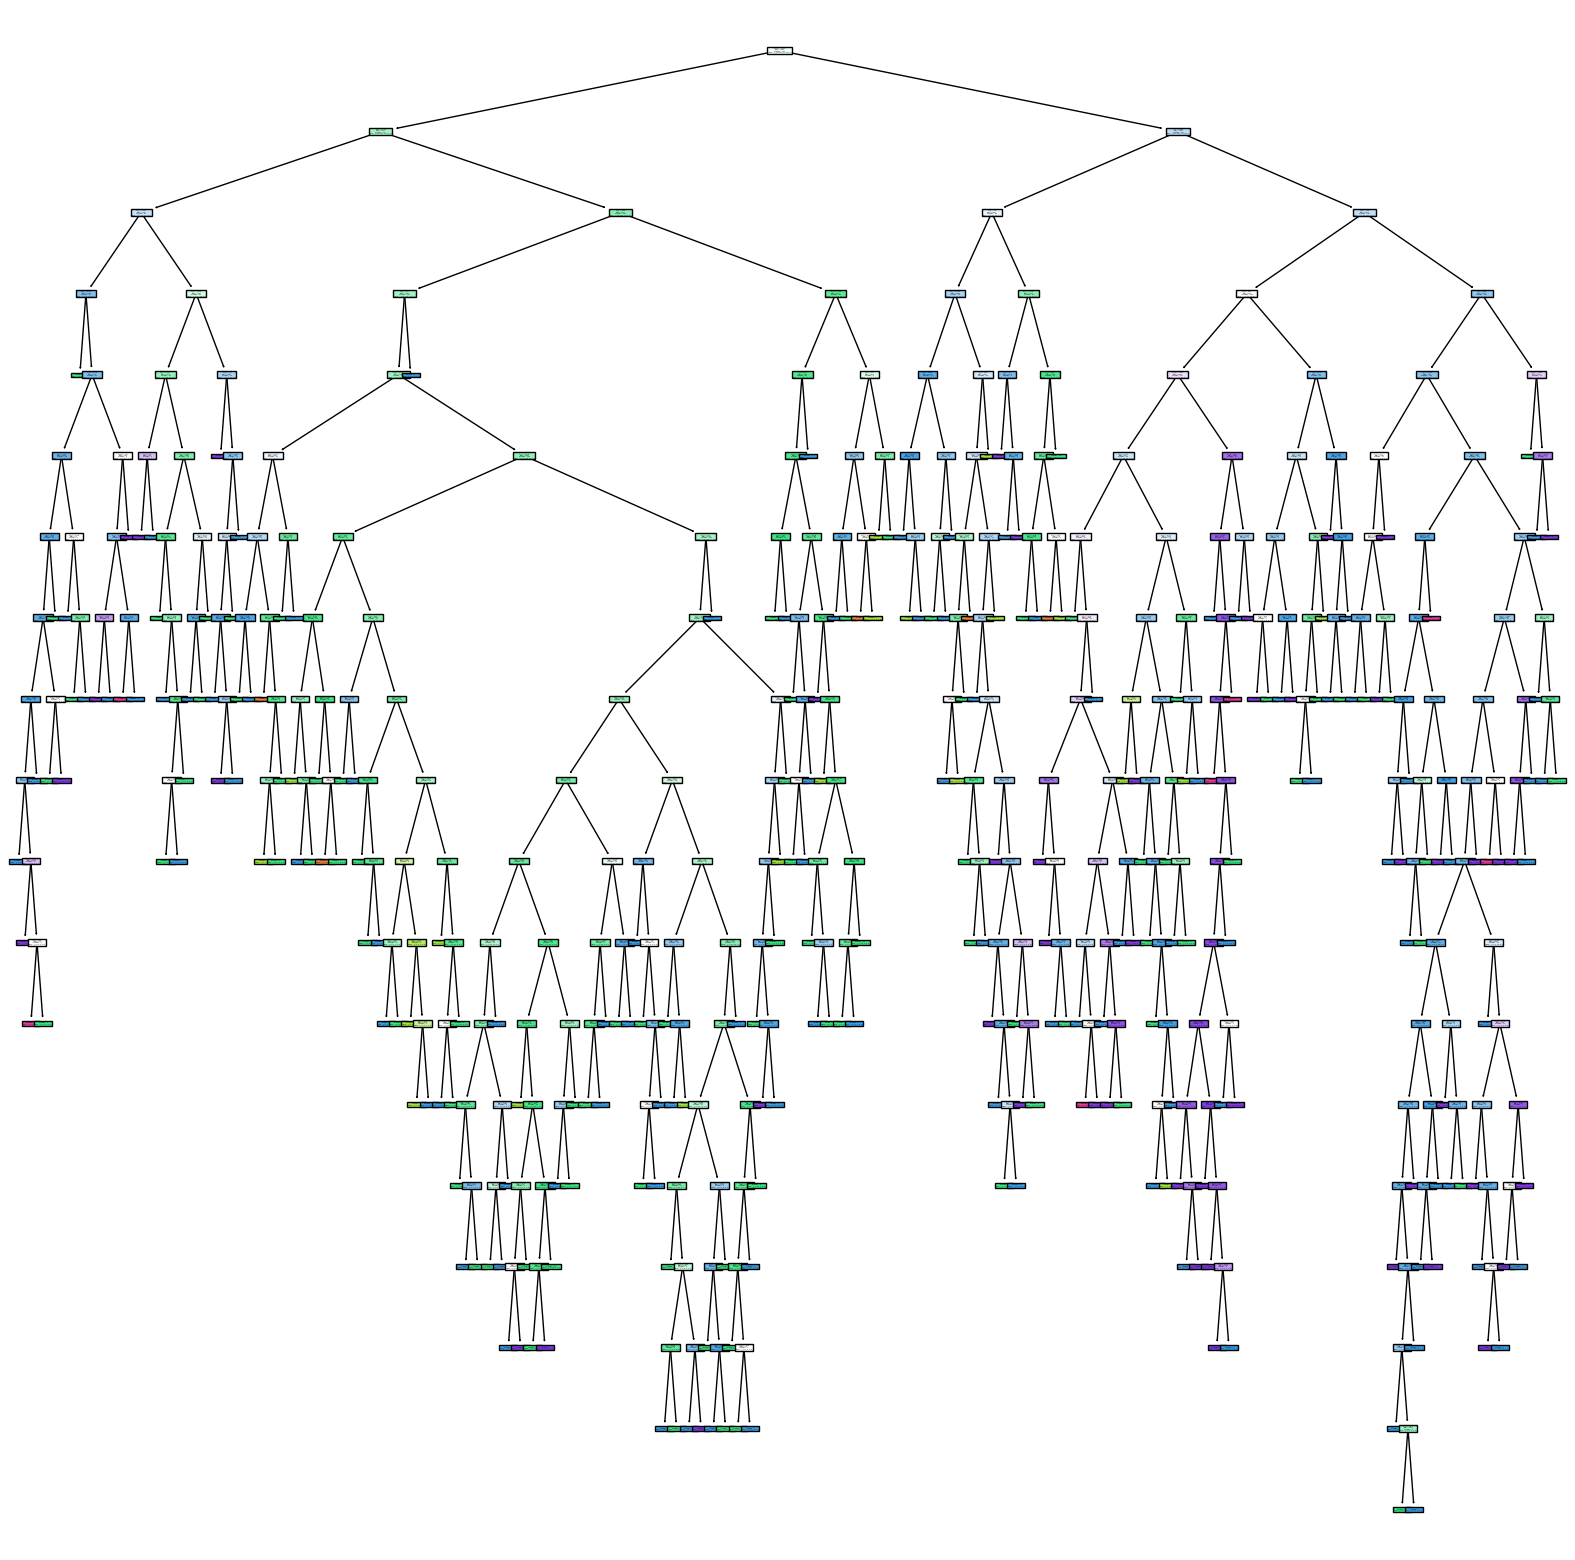

In [72]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

[Text(0.36994346733668343, 0.96875, 'X[9] <= 0.585\ngini = 0.638\nsamples = 750\nvalue = [12, 33, 495, 503, 145, 11]'),
 Text(0.13128140703517588, 0.90625, 'X[7] <= 0.995\ngini = 0.566\nsamples = 274\nvalue = [8, 17, 239, 155, 15, 0]'),
 Text(0.03542713567839196, 0.84375, 'X[8] <= 3.605\ngini = 0.653\nsamples = 60\nvalue = [2, 5, 35, 44, 12, 0]'),
 Text(0.023618090452261306, 0.78125, 'X[5] <= 5.5\ngini = 0.63\nsamples = 56\nvalue = [2, 2, 29, 44, 12, 0]'),
 Text(0.012060301507537688, 0.71875, 'X[4] <= 0.092\ngini = 0.628\nsamples = 13\nvalue = [0, 1, 12, 4, 6, 0]'),
 Text(0.008040201005025126, 0.65625, 'X[0] <= 6.35\ngini = 0.545\nsamples = 11\nvalue = [0, 1, 12, 1, 6, 0]'),
 Text(0.004020100502512563, 0.59375, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 7, 0, 0, 0]'),
 Text(0.012060301507537688, 0.59375, 'X[1] <= 0.375\ngini = 0.627\nsamples = 8\nvalue = [0, 1, 5, 1, 6, 0]'),
 Text(0.008040201005025126, 0.53125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 6, 0]'),
 Text(0.016080402010

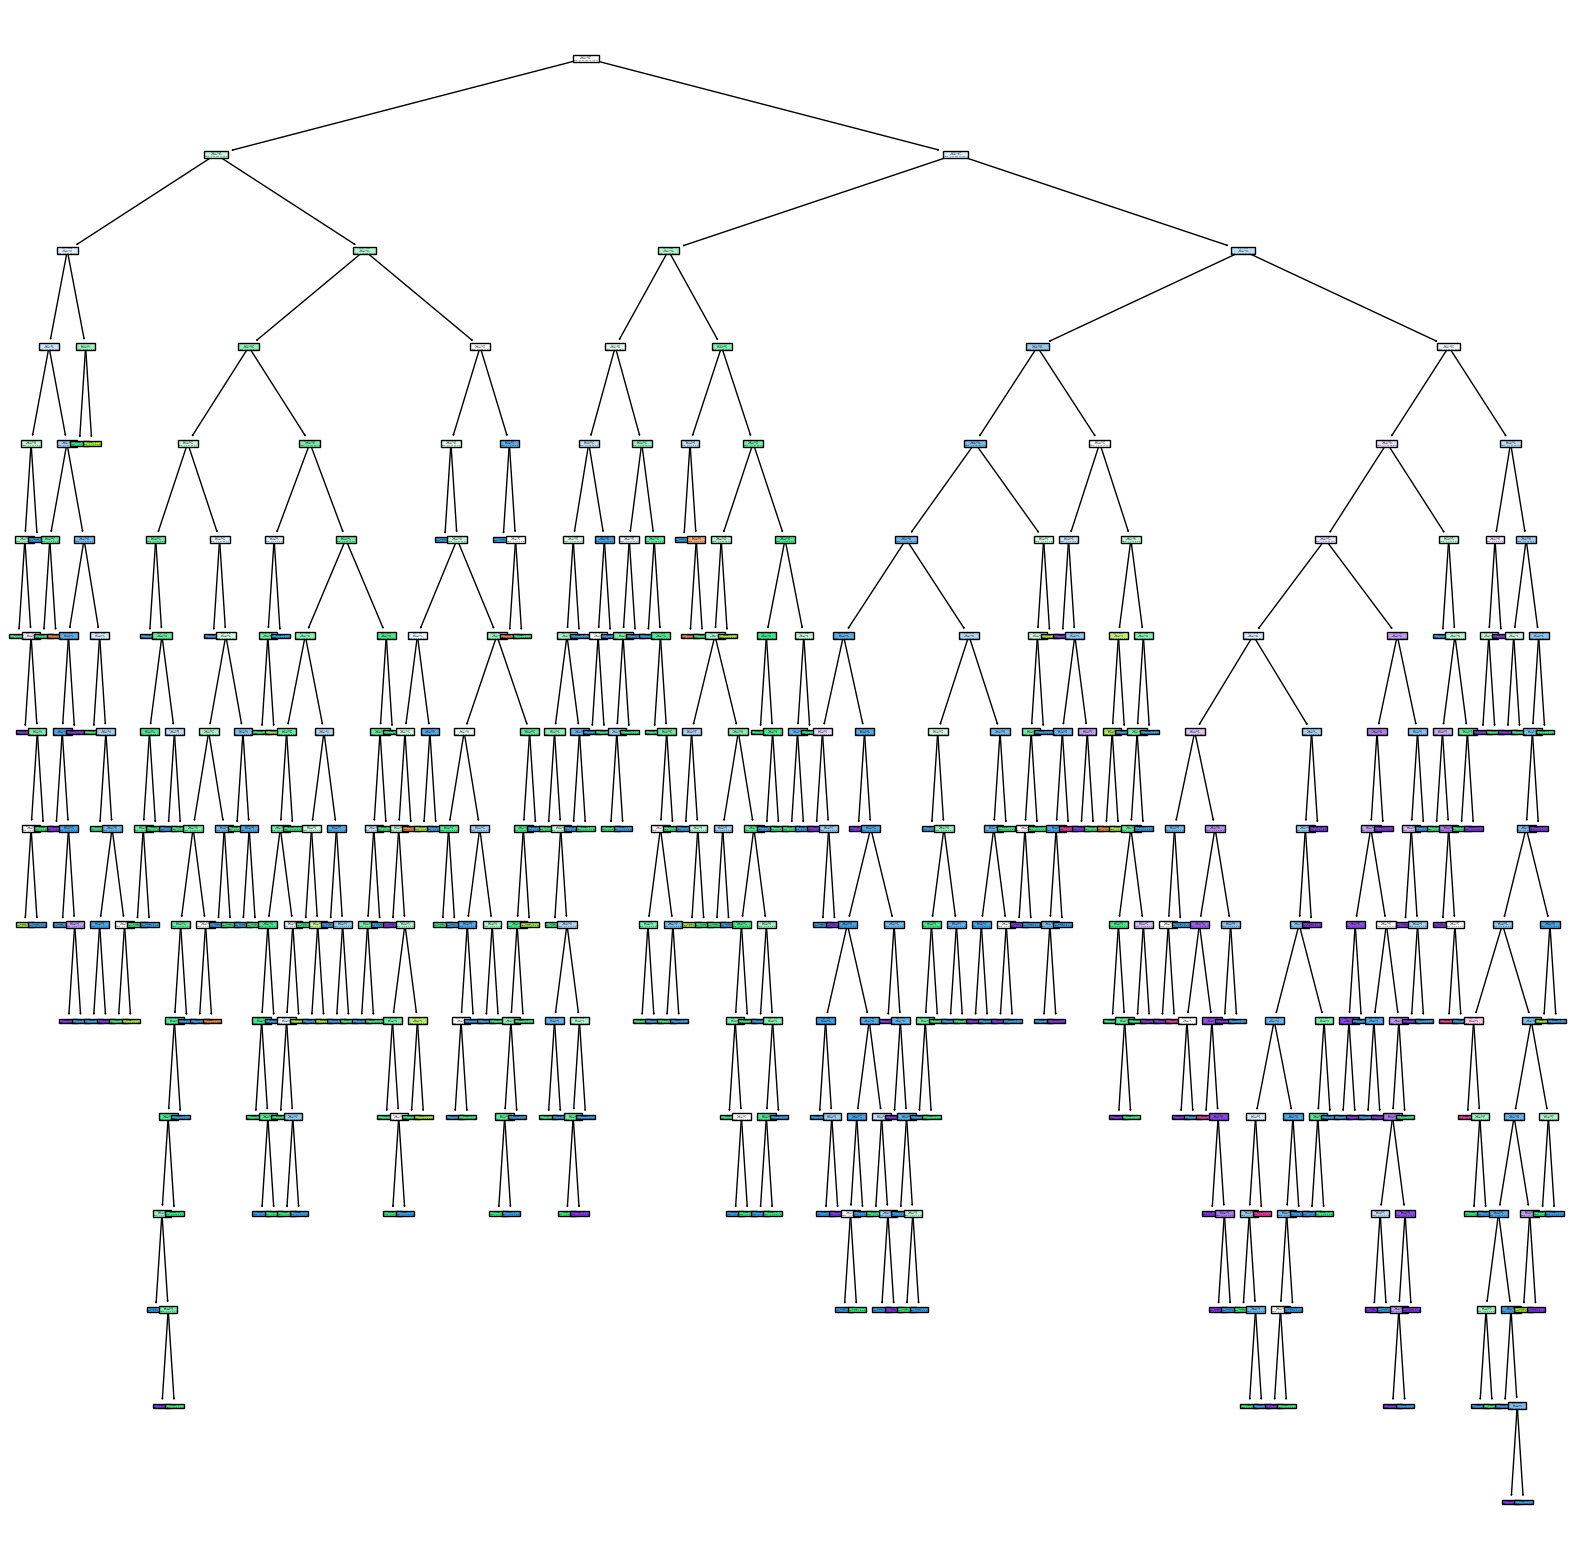

In [73]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[1],filled=True)

[Text(0.5349902511667894, 0.9722222222222222, 'X[1] <= 0.555\ngini = 0.646\nsamples = 758\nvalue = [7, 40, 494, 486, 163, 9]'),
 Text(0.21359923851633505, 0.9166666666666666, 'X[4] <= 0.069\ngini = 0.645\nsamples = 428\nvalue = [2, 7, 205, 320, 134, 9]'),
 Text(0.09285187914517318, 0.8611111111111112, 'X[9] <= 0.695\ngini = 0.606\nsamples = 108\nvalue = [0, 7, 18, 91, 51, 2]'),
 Text(0.05404077622205846, 0.8055555555555556, 'X[9] <= 0.585\ngini = 0.57\nsamples = 64\nvalue = [0, 7, 16, 63, 17, 0]'),
 Text(0.029476787030213707, 0.75, 'X[0] <= 6.45\ngini = 0.703\nsamples = 30\nvalue = [0, 7, 12, 20, 8, 0]'),
 Text(0.015720953082780643, 0.6944444444444444, 'X[10] <= 11.45\ngini = 0.586\nsamples = 10\nvalue = [0, 3, 9, 4, 0, 0]'),
 Text(0.007860476541390321, 0.6388888888888888, 'X[8] <= 3.31\ngini = 0.18\nsamples = 6\nvalue = [0, 0, 9, 1, 0, 0]'),
 Text(0.003930238270695161, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.011790714812085483, 0.58333333333

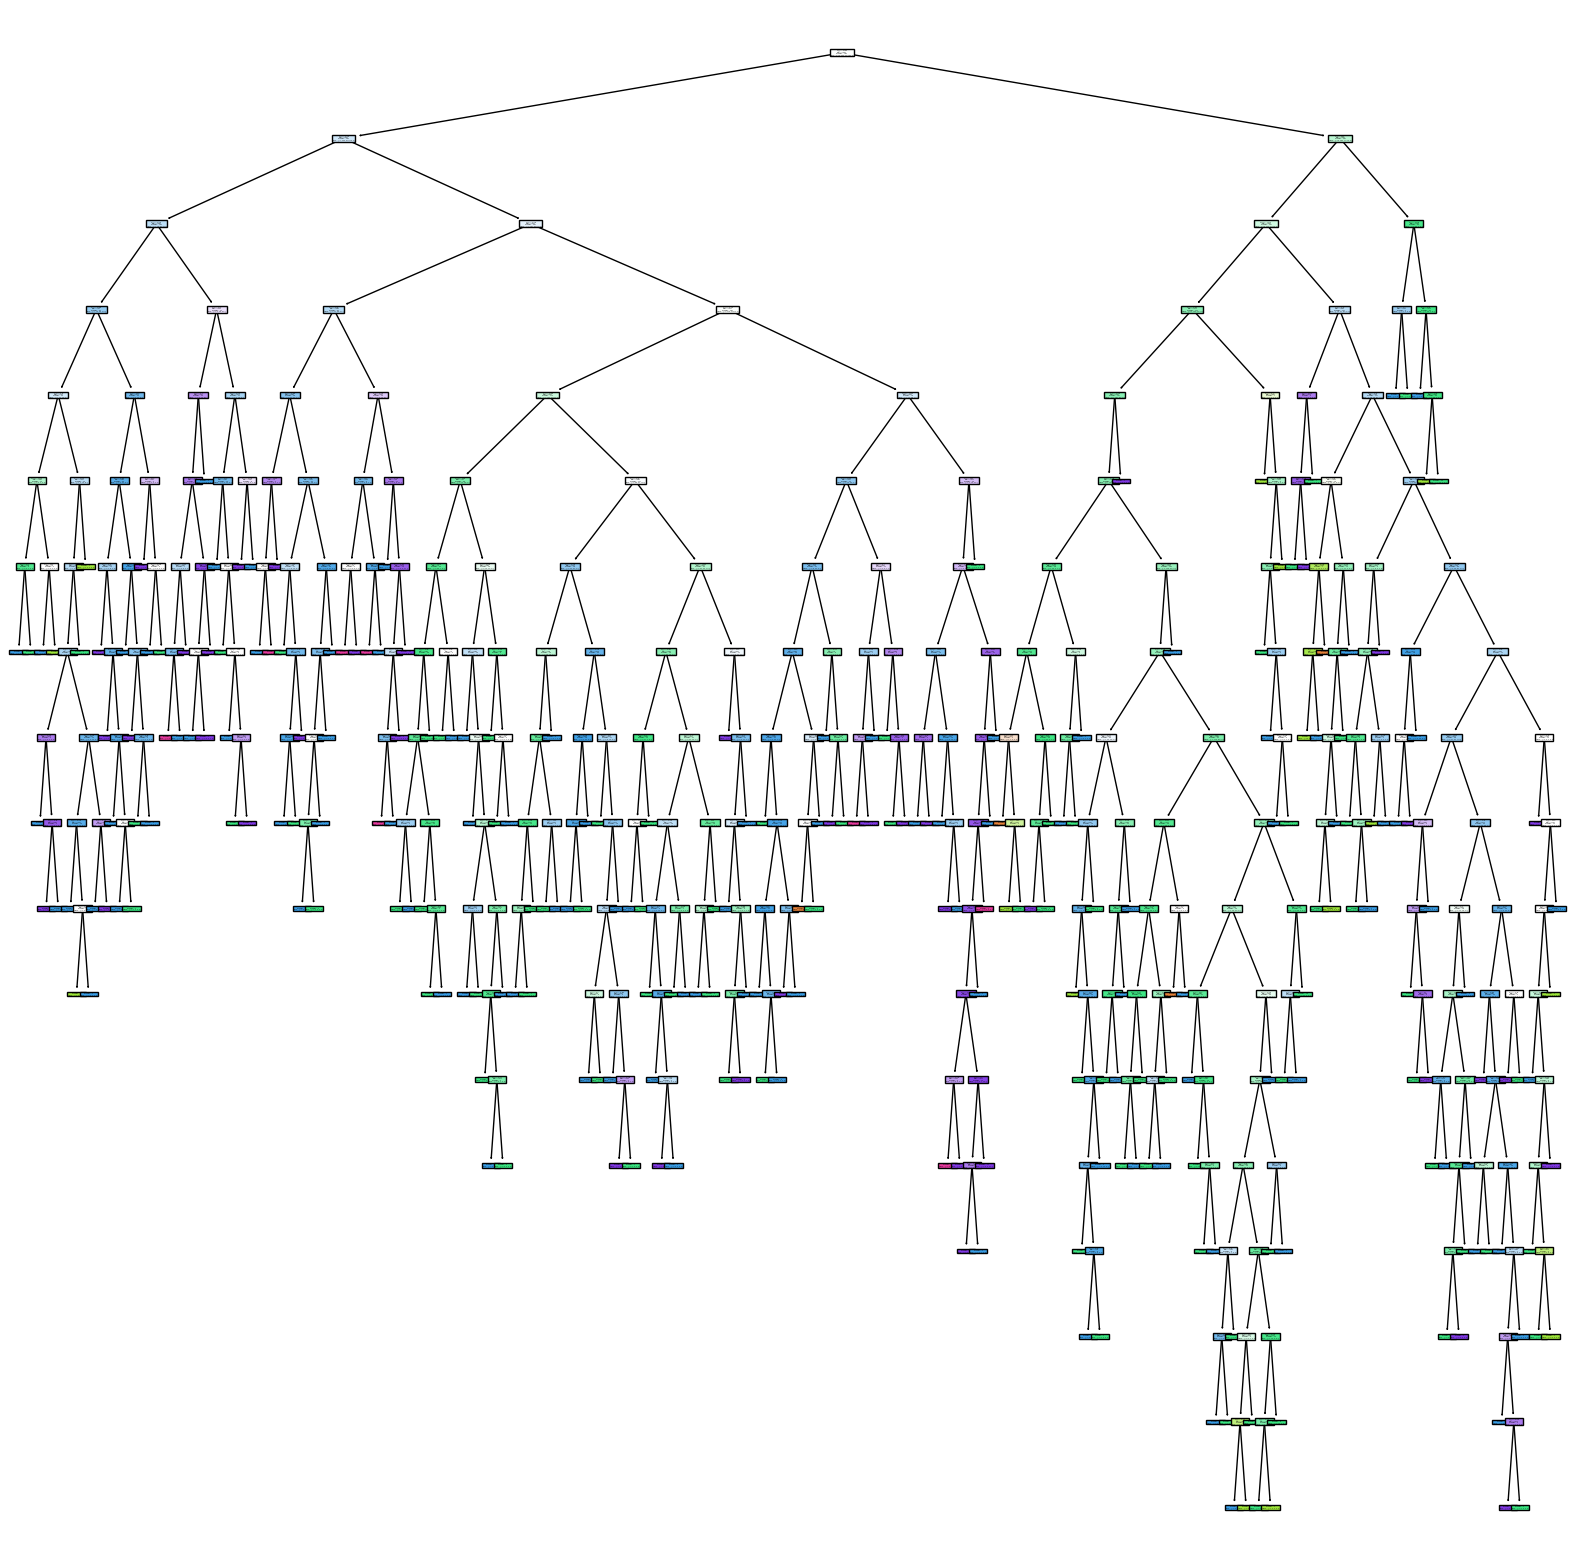

In [74]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[5],filled=True)

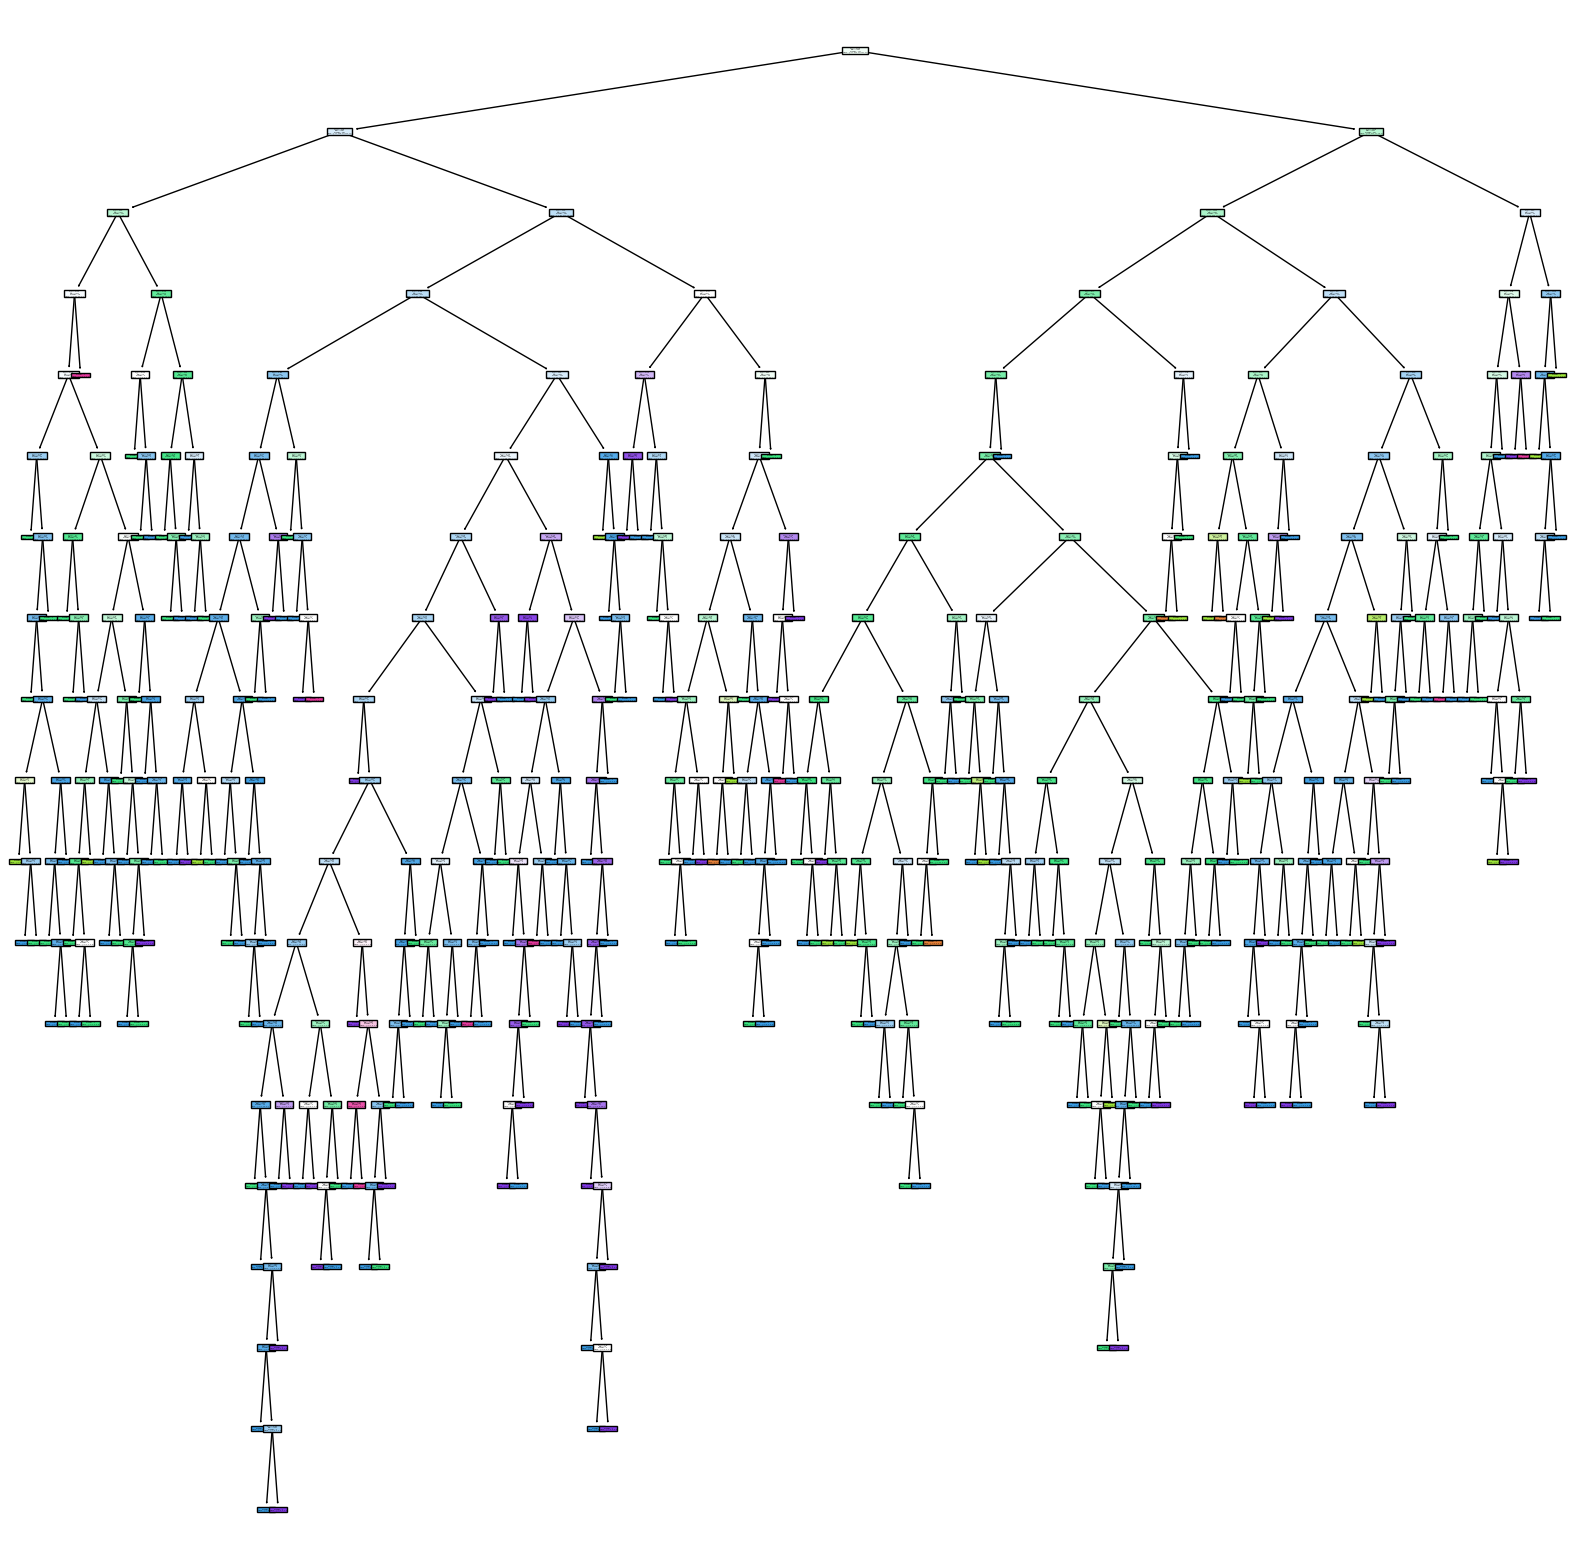

In [75]:
plt.figure(figsize=(20,20))
for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i],filled=True)

In [76]:
rand_pram = {
            "n_estimators":[5,10,50,100,120,150],
            "criterion":['gini','entropy'],
            "max_depth" : range(2,40,1),
            "min_samples_split":range(2,10 ,1),
            "min_samples_leaf":range(1,10,1),
        }

In [77]:
rand_ccp = RandomizedSearchCV(estimator=rf,param_distributions=rand_pram , cv = 10 , n_jobs=-1)

In [80]:
rand_ccp.fit(X,Y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 40),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [5, 10, 50, 100, 120,
                                                         150]})

In [81]:
rand_ccp.best_params_

{'n_estimators': 120,
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_depth': 21,
 'criterion': 'gini'}

In [92]:
rf_ne=RandomForestClassifier(criterion='gini',max_depth=21,min_samples_leaf=7,min_samples_split=6,n_estimators=120)

In [93]:
rf_ne.fit(x_train,y_train)

RandomForestClassifier(max_depth=21, min_samples_leaf=7, min_samples_split=6,
                       n_estimators=120)

In [94]:
rf_ne.score(x_test,y_test)

0.6525

[Text(0.5270330255681818, 0.9666666666666667, 'X[9] <= 0.685\ngini = 0.647\nsamples = 752\nvalue = [1, 36, 486, 492, 164, 20]'),
 Text(0.19256036931818182, 0.9, 'X[4] <= 0.065\ngini = 0.583\nsamples = 515\nvalue = [1, 34, 400, 336, 36, 6]'),
 Text(0.045454545454545456, 0.8333333333333334, 'X[4] <= 0.057\ngini = 0.589\nsamples = 64\nvalue = [1, 5, 24, 58, 12, 0]'),
 Text(0.022727272727272728, 0.7666666666666667, 'X[10] <= 11.35\ngini = 0.669\nsamples = 25\nvalue = [0, 3, 14, 17, 6, 0]'),
 Text(0.011363636363636364, 0.7, 'gini = 0.565\nsamples = 12\nvalue = [0, 2, 12, 5, 1, 0]'),
 Text(0.03409090909090909, 0.7, 'gini = 0.565\nsamples = 13\nvalue = [0, 1, 2, 12, 5, 0]'),
 Text(0.06818181818181818, 0.7666666666666667, 'X[10] <= 9.75\ngini = 0.494\nsamples = 39\nvalue = [1, 2, 10, 41, 6, 0]'),
 Text(0.056818181818181816, 0.7, 'gini = 0.604\nsamples = 10\nvalue = [1, 1, 7, 4, 0, 0]'),
 Text(0.07954545454545454, 0.7, 'X[0] <= 7.05\ngini = 0.359\nsamples = 29\nvalue = [0, 1, 3, 37, 6, 0]'),
 T

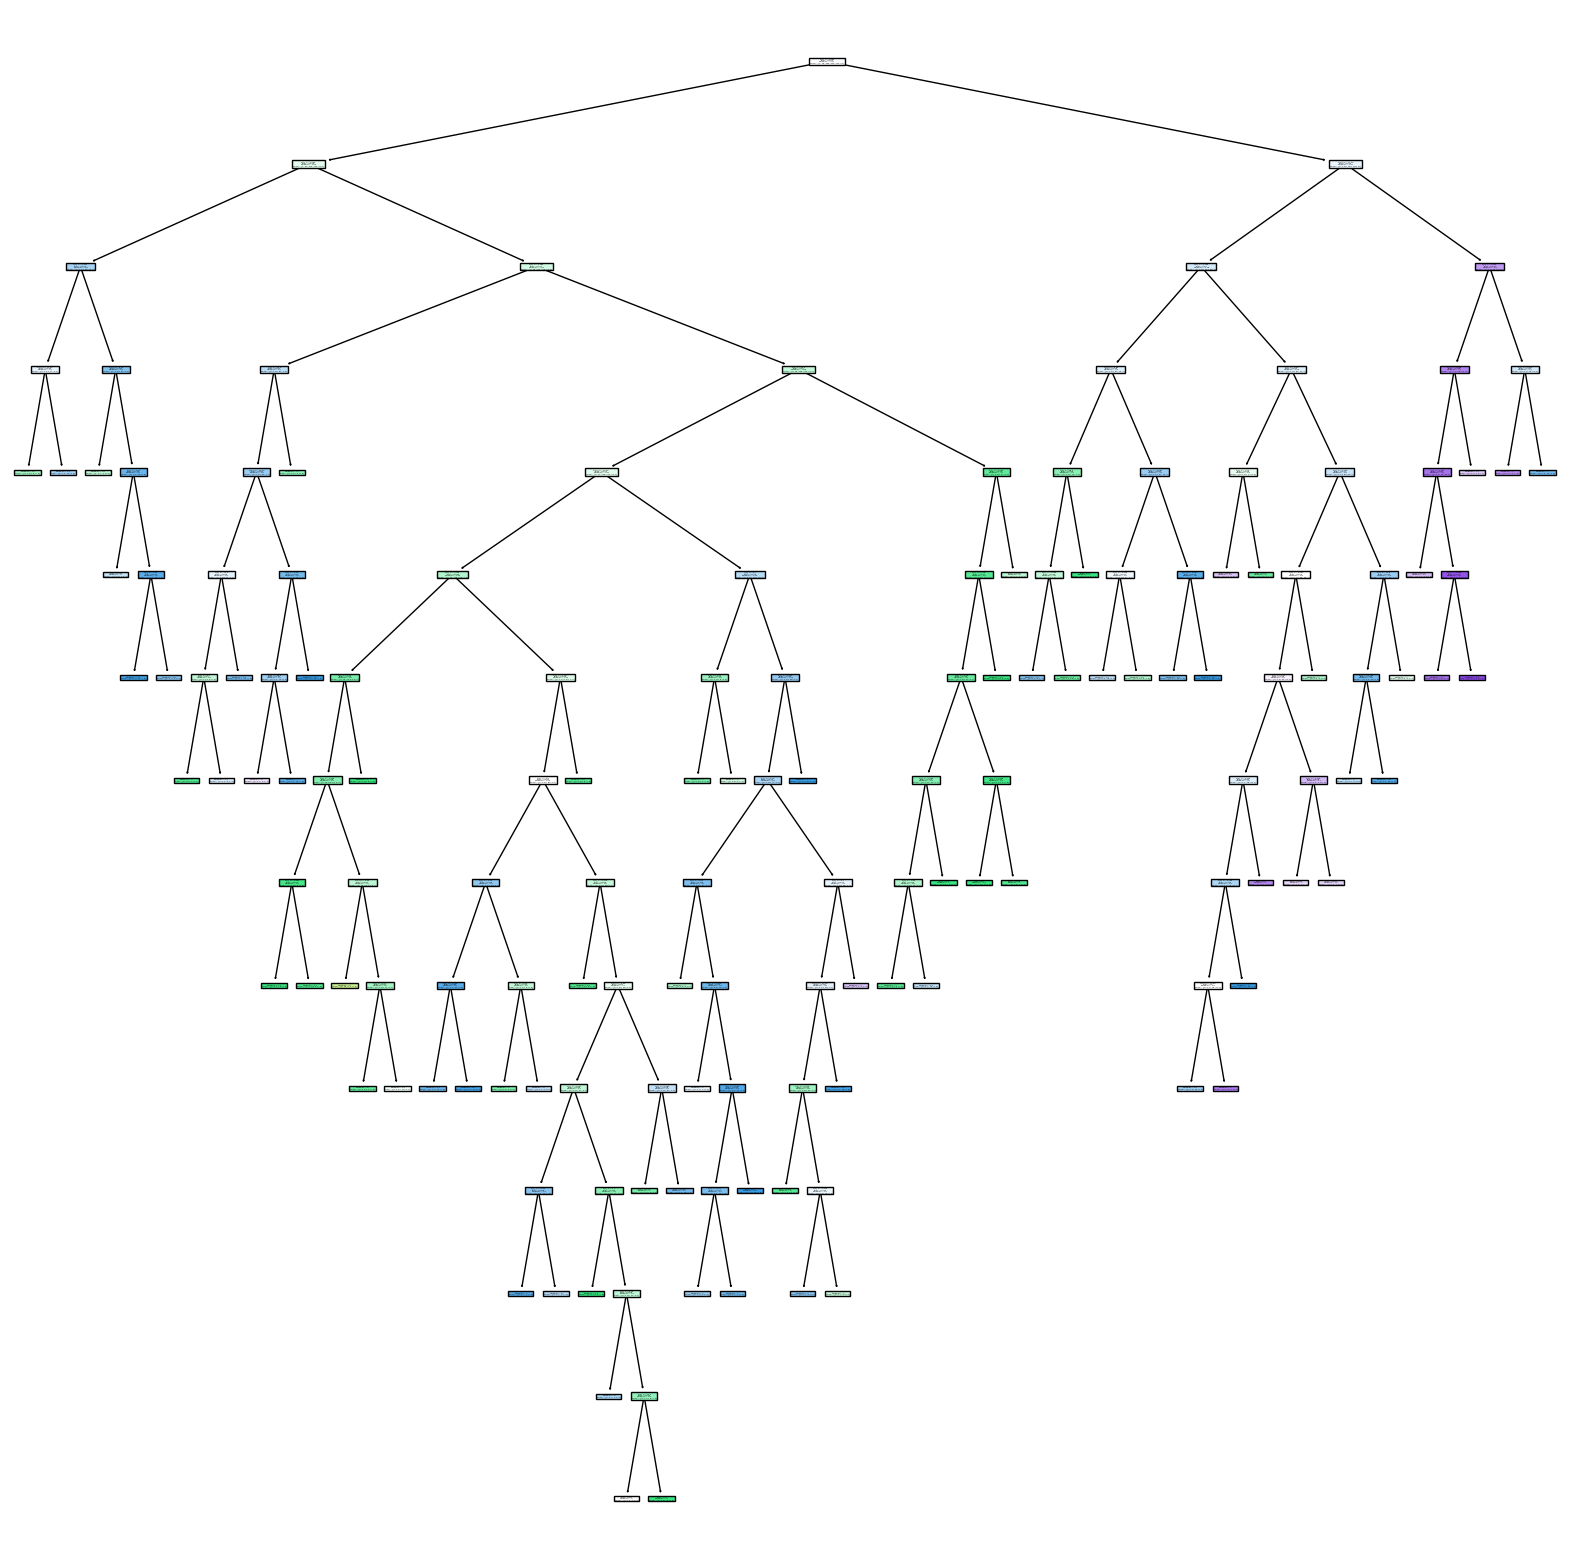

In [95]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf_ne.estimators_[0],filled=True)

In [82]:
grid_pram = {
    "n_estimators":[5,10,50,100,120,150],
    "criterion":['gini','entropy'],
    "max_depth":range(10),
    "min_samples_leaf":range(10)
}

In [83]:
gridsearch_rf = GridSearchCV(estimator=rf,param_grid=grid_pram,cv=10,n_jobs=6)

In [90]:
#gridsearch_rf.fit(x_train,y_train)

In [85]:
rf_new=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,n_estimators=120)

In [88]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=120)

In [89]:
rf_new.score(x_test,y_test)

0.6875

[Text(0.49888921800947866, 0.95, 'X[10] <= 10.35\nentropy = 1.695\nsamples = 766\nvalue = [7, 40, 497, 489, 158, 8]'),
 Text(0.23970675355450238, 0.85, 'X[10] <= 9.85\nentropy = 1.349\nsamples = 427\nvalue = [6, 23, 405, 203, 22, 0]'),
 Text(0.11374407582938388, 0.75, 'X[9] <= 0.495\nentropy = 1.178\nsamples = 304\nvalue = [2, 18, 317, 121, 6, 0]'),
 Text(0.058056872037914695, 0.65, 'X[1] <= 0.752\nentropy = 1.252\nsamples = 47\nvalue = [0, 13, 52, 13, 0, 0]'),
 Text(0.04028436018957346, 0.55, 'X[2] <= 0.19\nentropy = 1.026\nsamples = 42\nvalue = [0, 5, 49, 11, 0, 0]'),
 Text(0.02843601895734597, 0.45, 'X[10] <= 9.65\nentropy = 0.845\nsamples = 20\nvalue = [0, 0, 24, 9, 0, 0]'),
 Text(0.018957345971563982, 0.35, 'X[5] <= 28.5\nentropy = 0.439\nsamples = 12\nvalue = [0, 0, 20, 2, 0, 0]'),
 Text(0.014218009478672985, 0.25, 'X[4] <= 0.069\nentropy = 0.276\nsamples = 11\nvalue = [0, 0, 20, 1, 0, 0]'),
 Text(0.009478672985781991, 0.15, 'X[4] <= 0.063\nentropy = 0.918\nsamples = 2\nvalue = [

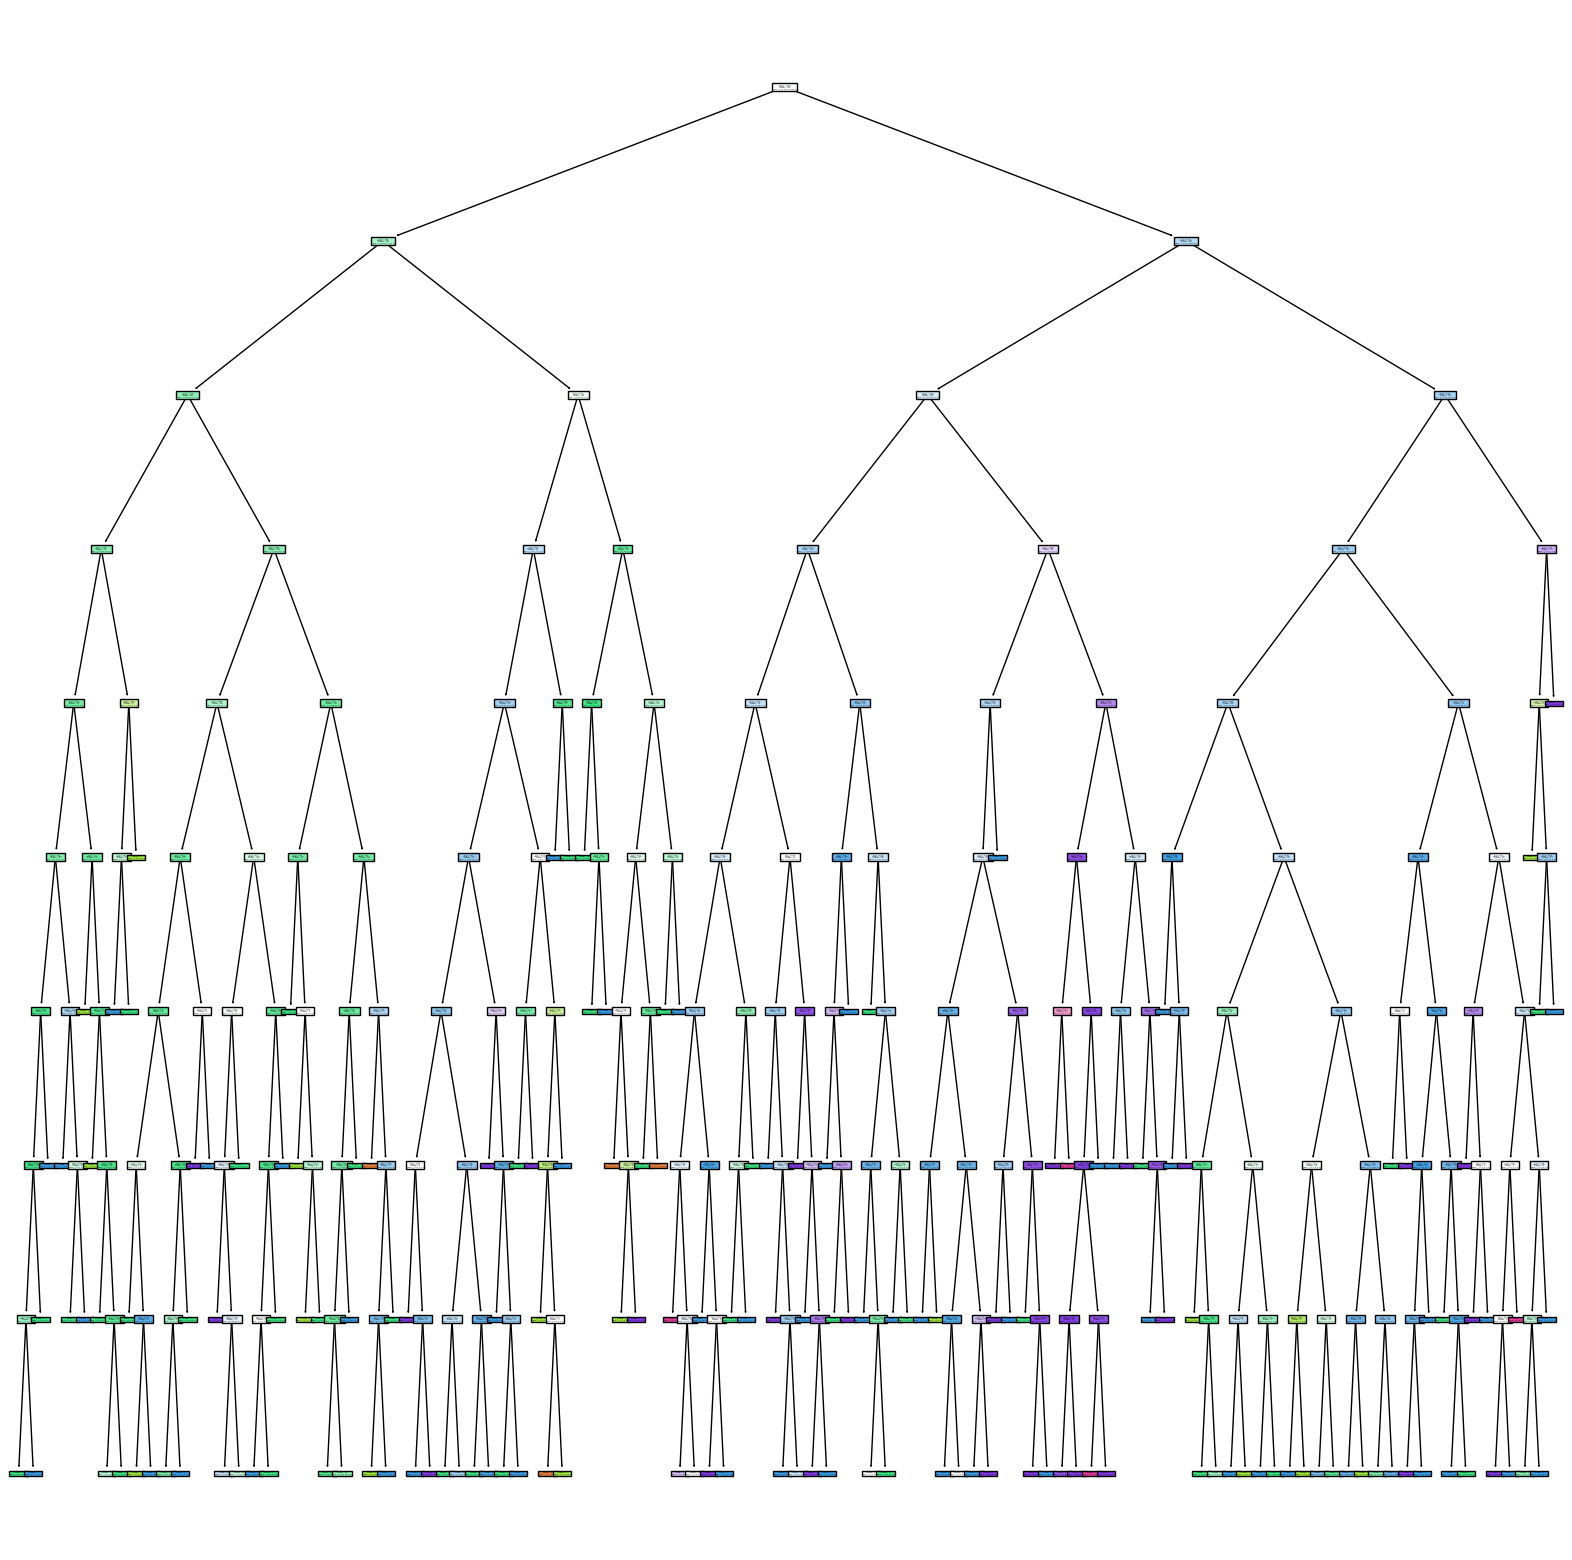

In [91]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf_new.estimators_[0],filled=True)

1. Google AI Blog
2. Papers with code